### Melchizedek Ackah-Blay

December 10, 2024

**Phone Prices - An Analysis**

*load libraries*

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

*loading dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/Cellphone.csv')

*looking at sample data*

In [3]:
df.sample(4)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
89,763,1302,140,127.9,4.0,235,2,1.2,8.000,1.000,2.0,0.0,1500,10.6
110,64,754,299,77.9,2.4,167,0,0.0,0.004,0.004,0.0,0.0,850,12.4
12,622,2174,16,140.0,5.0,294,4,1.3,16.000,1.000,13.0,5.0,2000,8.2
158,856,3260,8809,150.0,5.5,401,8,2.2,64.000,4.000,20.0,20.0,3000,6.8


*looking at summary data information*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


*looking at summary statistics*

In [5]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


*addressing null values*

In [6]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

*addressing duplicates*

In [7]:
df.duplicated().sum()

0

*making columns lower case to be easier to work with*

In [10]:
df.columns = df.columns.str.lower()

*splitting data into x and y*

In [13]:
x = df.drop(columns = ['product_id', 'price'])
y = df['price']

*no label encoding needed since all features are **numerical***

#### feature selection

In [136]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func = chi2, k = 11)
x2 = selector.fit_transform(x, y)

*displaying selected x features*

In [137]:
display(pd.DataFrame(x2).head(5))

# get the boolean mask of selected features
selected_mask = selector.get_support()

# get the column names of the selected features
selected_columns = x.columns[selected_mask]

print("\n\nSelected Features:")
print(selected_columns)


,0,1,2,3,4,5,6,7,8,9,10
0,10.0,135.0,5.2,424.0,8.0,16.0,3.000,13.00,8.0,2610.0,7.4
1,10.0,125.0,4.0,233.0,2.0,4.0,1.000,3.15,0.0,1700.0,9.9
2,10.0,110.0,4.7,312.0,4.0,8.0,1.500,13.00,5.0,2000.0,7.6
3,11.0,118.5,4.0,233.0,2.0,4.0,0.512,3.15,0.0,1400.0,11.0
4,11.0,125.0,4.0,233.0,2.0,4.0,1.000,3.15,0.0,1700.0,9.9




Selected Features:
Index(['sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'internal mem',
       'ram', 'rearcam', 'front_cam', 'battery', 'thickness'],
      dtype='object')


*split data into train and test*

In [138]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x2, y, test_size = 0.2, random_state = 2)

*scaling the x values*

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

*function to evaluate models*

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluator(pred):
    print(f'mean squared error" {mean_squared_error(y_test, pred)}')
    print(f'mean absolute error" {mean_absolute_error(y_test, pred)}')
    print(f'r2 squared" {r2_score(y_test, pred)}')

*implementing 1st model: **Linear Regression***

In [141]:
from sklearn.linear_model import LinearRegression
l_mod = LinearRegression()

# training the model
l_mod.fit(x_train_scaled, y_train)

# initializing parameter for making predictions
l_pred = l_mod.predict(x_test_scaled)

#evaluating model
evaluator(l_pred)

mean squared error" 48766.21035439262
mean absolute error" 183.93634429103255
r2 squared" 0.8808129737827125


*implementing 2nd model: **GridSearch RandomForest***

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# initilizing parameter grid
p1 = {
    'n_estimators':[50, 100, 250],
    'max_depth': [None, 5, 10],
    'min_samples_split':[1,2,5,7]
}

# training model
rf = GridSearchCV(RandomForestRegressor(), param_grid = p1)
rf.fit(x_train_scaled, y_train)

# initializing parameter for making predictions
rf_pred = rf.predict(x_test_scaled)

#evaluating model
evaluator(rf_pred)

mean squared error" 34211.05924848484
mean absolute error" 146.53212121212118
r2 squared" 0.9163864818295634


In [143]:
# identifying best parameters
rf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

*implementing 3rd model: **Support Vector Machine***

In [158]:
from sklearn.svm import SVR

# initilizing parameter grid
p2 = {
    'C':[2, 3],
    'kernel':['linear', 'poly', 'rbf'],
    'degree':[0.8, 1,1.5]
}

# training model
sv = GridSearchCV(SVR(), param_grid = p2)
sv.fit(x_train_scaled, y_train)

# initializing parameter for making predictions
sv_pred = sv.predict(x_test_scaled)

#evaluating model
evaluator(sv_pred)

mean squared error" 30456.511788641732
mean absolute error" 144.3713220077751
r2 squared" 0.9255627812237209


In [159]:
sv.best_params_

{'C': 3, 'degree': 1, 'kernel': 'linear'}

*comparing residual plots of both models*

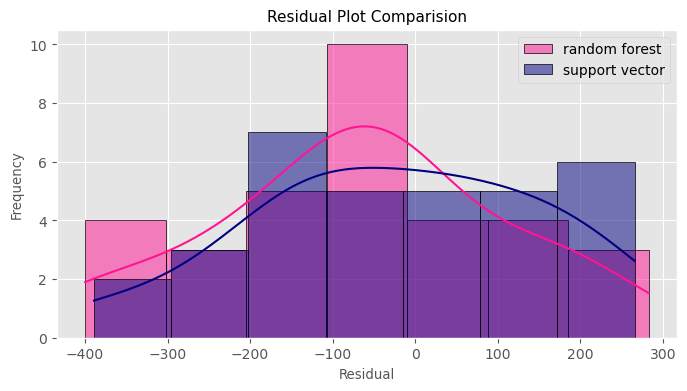

In [171]:
# residuals = actual values - predicted values

# random forest residuals
rf_residuals = y_test - rf_pred

# support vector residuals
sv_residuals = y_test - sv_pred

plt.figure(figsize = (8, 4))
sns.histplot(rf_residuals, kde = True, edgecolor = 'black', color = 'deeppink', label = 'random forest') 
sns.histplot(sv_residuals, kde = True, edgecolor = 'black', color = 'navy', label = 'support vector')
plt.title('Residual Plot Comparision', fontsize = 11)
plt.xlabel('Residual', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.legend()
plt.show()

*comparing qq plots*

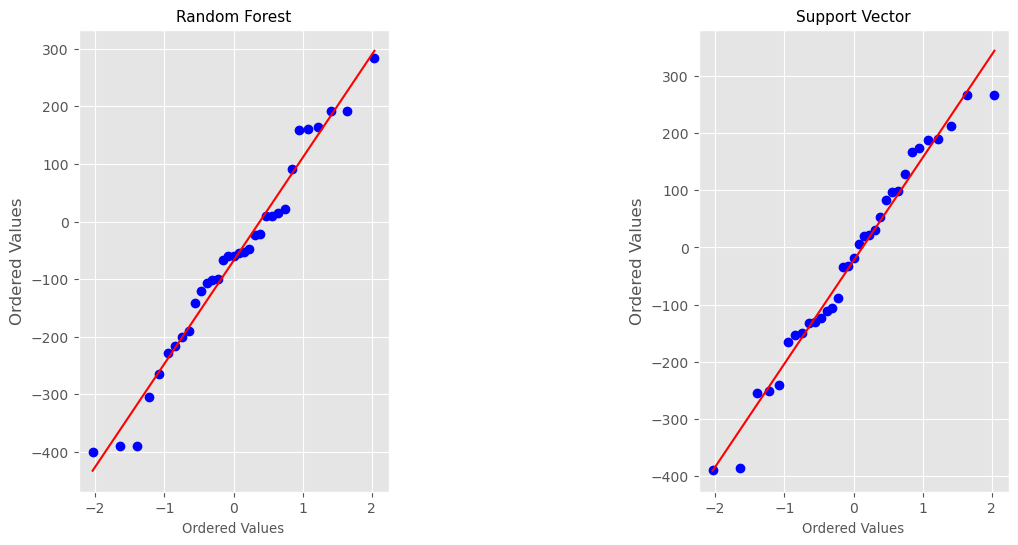

In [189]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
import pylab
import scipy.stats as stat
stat.probplot(rf_residuals, dist = 'norm', plot = pylab)
plt.title('Random Forest', fontsize = 11)
plt.xlabel('Theoretical Quantiles', fontsize = 9.5)
plt.xlabel('Ordered Values', fontsize = 9.5)
plt.subplot(1,2,2)

stat.probplot(sv_residuals, dist = 'norm', plot = pylab)
plt.title('Support Vector', fontsize = 11)
plt.xlabel('Theoretical Quantiles', fontsize = 9.5)
plt.xlabel('Ordered Values', fontsize = 9.5)
plt.subplots_adjust(wspace = 1)
pylab.show()

### Conclusion

Based on the performance metrics and visual analysis of residuals and Q-Q plots, I would conclude the following:

1. **Support Vector Regressor (SVR)** provides more accurate predictions in terms of MSE, MAE, and R². This suggests that SVR is better at directly estimating phone prices based on the features provided. If minimizing prediction errors is my primary goal, SVR would be the preferred model.

2. However, the **Random Forest model** exhibits more stable residuals and a better Q-Q plot, indicating that it may generalize better across different subsets of the data. This could suggest that Random Forest is less prone to overfitting and might be more reliable when faced with unseen data, making it a good choice if model stability and robustness are prioritized.

#### Final Decision:
Given that the goal is to predict phone prices, I would lean towards **SVR** for its superior accuracy in prediction. However, if generalization and robustness to overfitting are more important, or if there are concerns about the stability of predictions in real-world scenarios, **Random Forest** could be a better option. Another possibility could be combining the strengths of both models through an ensemble approach to further improve the predictive power and robustness.
